# Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable. It is widely used in many fields, including machine learning, most medical fields, and social sciences.

The logistic function is a sigmoid function, which takes any real-valued number and maps it into a value between 0 and 1. It is defined as:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

The graph of the logistic function is the following:

<p align="center">
  <img src="https://www.researchgate.net/publication/336974843/figure/fig1/AS:820596623540224@1572656889884/Logistic-function-curve-This-is-a-standard-logistic-function-and-it-has-a-typical-S.png" />
</p>

The logistic regression model is defined as:
\begin{align*}
P(y=1 | x; w_0) &= \sigma(w \cdot x) \\
P(y=0 | x; w_0) &= 1 - \sigma(w \cdot x)
\end{align*}

Where:
- $P(y=1|x)$ is the probability that the output is 1 given the input $x$
- $\sigma$ is the logistic function
- $w$ is the weight vector extended with the bias term $w_0$ as $w = [w_0, w_1, w_2, ..., w_n]$

We can use the exponential trick to combine the two equations into one:
$$
P(y|x; w_0) = \sigma(w \cdot x)^y \cdot \left[1 - \sigma(w \cdot x) \right]^{1-y}
$$

Thus, the likelihood of the data is:
\begin{align*}
L(w) &= \prod_{i=1}^{N} P(y^{(i)}|x^{(i)}; w_0) \\
&= \prod_{i=1}^{N} \sigma(w \cdot x^{(i)})^{y^{(i)}} \cdot \left[1 - \sigma(w \cdot x^{(i)}) \right]^{1-y^{(i)}} \\
\end{align*}

The **log-likelihood** is:
\begin{align*}
l(w) &= \log L(w) \\
&= \sum_{i=1}^{N} y^{(i)} \log \sigma(w \cdot x^{(i)}) + (1 - y^{(i)}) \log(1 - \sigma(w \cdot x^{(i)})
\end{align*}


The loss function used in logistic regression is the binary cross-entropy loss, which is defined as:
$$
L(y, \hat{y}) = -\frac{1}{N} \sum_{i=1}^{N} y^{(i)} \log \sigma(w \cdot x^{(i)}) + (1 - y^{(i)}) \log(1 - \sigma(w \cdot x^{(i)}))
$$

Where:
- $N$ is the number of samples
- $y$ is the true output
- $\hat{y}$ is the predicted output

The goal of logistic regression is to minimize the loss function with respect to the weights and bias. This can be done using gradient descent.

A derivative of the loss function with respect to the weights and bias is:

\begin{align*}
\frac{\partial L}{\partial w} &= -\frac{1}{N} \sum_{i=1}^{N} y^{(i)} \frac{\partial}{\partial w} \log \sigma(w \cdot x^{(i)}) + (1 - y^{(i)}) \frac{\partial}{\partial w} \log(1 - \sigma(w \cdot x^{(i)})) \\
&= -\frac{1}{N} \sum_{i=1}^{N} y^{(i)} \frac{1}{\sigma(w \cdot x^{(i)})} \frac{\partial}{\partial w} \sigma(w \cdot x^{(i)}) + (1 - y^{(i)}) \frac{1}{1 - \sigma(w \cdot x^{(i)})} \frac{\partial}{\partial w} (1 - \sigma(w \cdot x^{(i)})) \\
&= -\frac{1}{N} \sum_{i=1}^{N} y^{(i)} \frac{1}{\sigma(w \cdot x^{(i)})} \sigma(w \cdot x^{(i)}) \left[1 - \sigma(w \cdot x^{(i)}) \right] x^{(i)} + (1 - y^{(i)}) \frac{1}{1 - \sigma(w \cdot x^{(i)})} (-\sigma(w \cdot x^{(i)}) (1 - \sigma(w \cdot x^{(i)})) x^{(i)}) \\
&= -\frac{1}{N} \sum_{i=1}^{N} y^{(i)} \left[1 - \sigma(w \cdot x^{(i)}) \right] x^{(i)} - (1 - y^{(i)}) \sigma(w \cdot x^{(i)}) x^{(i)} \\
&= -\frac{1}{N} \sum_{i=1}^{N} \left[ y^{(i)} - \sigma(w \cdot x^{(i)}) \right] x^{(i)}  
\end{align*}

In order to train the model, we need to update the weights and bias on each iteration using the following update rule:
\begin{align*}
w &= w - \alpha \frac{\partial L}{\partial w} \\
&= w + \frac{\alpha}{N} \sum_{i=1}^{N} \left[ y^{(i)} - \sigma(w \cdot x^{(i)}) \right] x^{(i)}
\end{align*}

Where:
- $\alpha$ is the learning rate
- $\frac{\partial L}{\partial w}$ is the derivative of the loss function with respect to the weights and bias
- $w$ is the weight vector extended with the bias term

In this notebook, we will implement logistic regression using Python and NumPy, and then we will test the model on the breast cancer dataset.

Let's start by importing the required libraries:

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

epsilon = 1e-6

Now, let's load the breast cancer dataset and split it into training and testing sets:

In [85]:
df = pd.read_csv('breast_cancer.csv')

# drop the last column
df.drop(df.columns[-1], axis=1, inplace=True)

# drop the first column
df.drop(df.columns[0], axis=1, inplace=True)

# target column: encode M as 1 and B as 0
df.iloc[:, 0] = df.iloc[:, 0].map({'M': 1, 'B': 0})
y = df.iloc[:, 0]

#split the data into training and testing
X = df.drop(df.columns[0], axis=1)

X_train = X.iloc[:500, :]
y_train = y.iloc[:500]

X_test = X.iloc[500:, :]
y_test = y.iloc[500:]

Normalize the training and testing sets:

In [86]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

X_train = (X_train - X_train.mean(axis=0)) / (X_train.std(axis=0) + epsilon)
X_test = (X_test - X_test.mean(axis=0)) / (X_test.std(axis=0) + epsilon)

Let's implement logistic regression using Python and NumPy. First, we'll plot the correlation matrix to see the relationships between the features:

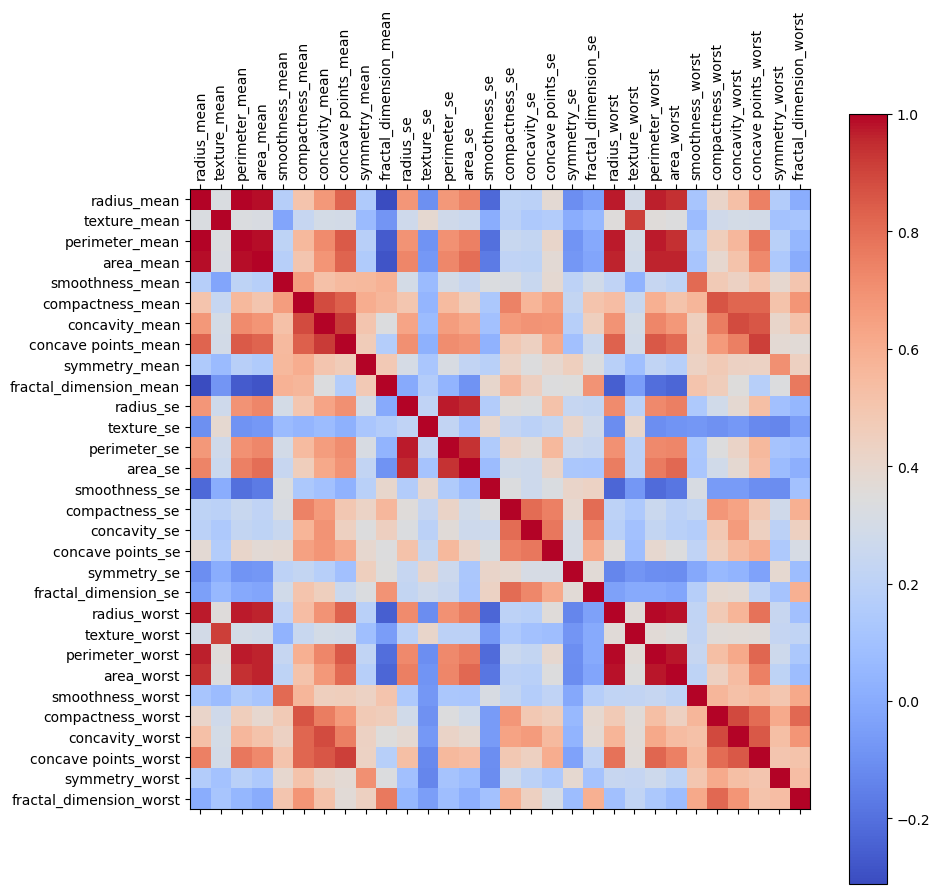

In [87]:
def plot_corr_matrix(X):
    corr = X.corr()
    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.matshow(corr, cmap='coolwarm')
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    fig.colorbar(cax)
    plt.show()

plot_corr_matrix(X)

As a first step, we need the sigmoid function, which we will use to make predictions:

In [88]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

We'll define the `logistic cost function` that we discussed earlier:

In [89]:
def cost_function(X, y, w):
    m = len(y)
    sum = 0

    for i in range(m):
        h = sigmoid(np.dot(w, X[i]))
        sum += y[i] * np.log(h + epsilon) + (1 - y[i]) * np.log(1 - h + epsilon)

    return -sum / m

Here is the implementation of the `gradient descent` algorithm to minimize the cost function:

In [90]:
def logistic_regression(X, y, alpha=0.01, n_iter=5000):
    n, m = X.shape
    X = np.c_[np.ones(n), X]
    w = np.random.randn(m + 1)
    L_history = np.array([], dtype=float)

    for iterations in range(n_iter):
        w_temp = np.zeros(m + 1)
        
        for j in range(n):
            z = np.dot(w, X[j])
            h = sigmoid(z)
            w_temp += (y[j] - h) * X[j]

        w = w + alpha / n * w_temp
        L_history = np.append(L_history, cost_function(X, y, w))

        if len(L_history) > 1 and np.abs(L_history[-1] - L_history[-2]) < 1e-5:
            break

    return w, L_history, iterations

Let's train the model and evaluate it on the test set:

In [91]:
w, L_history, iterations = logistic_regression(X_train, y_train)

print(f'Optimal weights: {w}')
print(f'Number of iterations: {iterations + 1}')

Optimal weights: [-6.17230304e-01  1.13690281e-03  2.14016973e-01  7.87120152e-03
 -2.38572955e-01 -1.08695957e+00  1.21352156e-02 -2.63000710e-01
  2.90110419e+00  3.58074293e-01 -6.93729853e-01  9.43662285e-01
 -9.13834287e-01  7.54756262e-01  1.29305321e+00 -2.14062991e-02
  5.48150812e-01  8.76312427e-02 -2.94770097e-02  1.59561307e-01
 -1.02050796e+00  1.71712938e+00  1.42724659e+00 -6.86977583e-01
 -2.73844986e-01  1.53474520e+00  7.08526959e-01 -2.00601173e-02
  7.64806781e-01 -2.17708925e-01 -1.54097050e-01]
Number of iterations: 2498


Evaluate the model on the test set:

In [92]:
# evaluate the model
X_test = np.c_[np.ones(X_test.shape[0]), X_test]
y_pred = np.array([], dtype=float)

n = len(y_test)

for i in range(n):
    h = sigmoid(np.dot(X_test[i], w))
    y_pred = np.append(y_pred, h)

y_pred = np.where(y_pred > 0.5, 1, 0)

accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {round(accuracy * 100, 4)}%')

Accuracy: 98.5507%


Plot the accuracy on the training and testing sets using a confusion matrix:

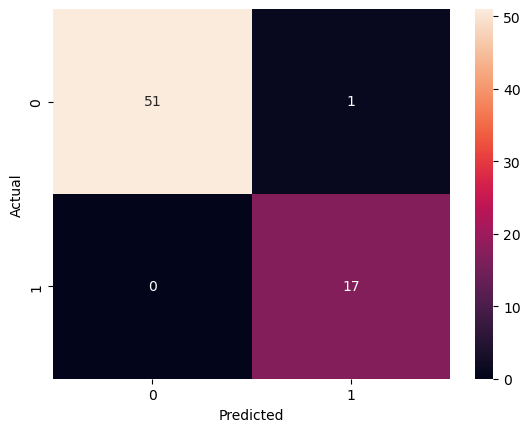

In [93]:
y_test = y_test.to_numpy(dtype=np.int32)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

A final plot with the cost function over the iterations:

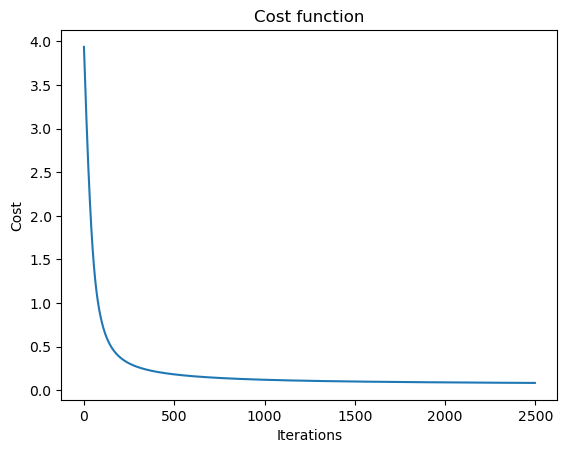

In [94]:
plt.plot(range(iterations + 1), L_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function')
plt.show()